## Processing Emotion Videos for **Résident3**

###  Setting up the Detector

We'll begin by creating a new `Detector` instance just like the previous tutorial and using the defaults:

In [1]:
from feat import Detector

detector = Detector()

detector

INFO:root:Loading Face model: retinaface
INFO:root:Loading Facial Landmark model: mobilefacenet
INFO:root:Loading facepose model: img2pose
INFO:root:Loading AU model: xgb
INFO:root:Loading emotion model: resmasknet
INFO:root:Loading Identity model: facenet


feat.detector.Detector(face_model=retinaface, landmark_model=mobilefacenet, au_model=xgb, emotion_model=resmasknet, facepose_model=img2pose, identity_model=facenet)

In [2]:
from IPython.core.display import Video, display
import os
import cv2


base_path = "/home/maram/Downloads/PrendreLaParole/newFPS/resident3"

## 1 Processing the 1st video: Happiness

### 1.1 Load the video

In [3]:

emotionHappiness_dir = os.path.join(base_path, "happiness")

for filename in os.listdir(emotionHappiness_dir):
    if filename.lower().endswith(".mp4"):
        path_to_vidHappiness = os.path.join(emotionHappiness_dir, filename)
        print(f"\n--- happiness ---")
        video = cv2.VideoCapture(path_to_vidHappiness)
        fps = video.get(cv2.CAP_PROP_FPS)
        print(f"FPS: {fps}")
        video.release()
        display(Video(path_to_vidHappiness, embed=False))



--- happiness ---
FPS: 25.0


### 1.2 Process the video

In [4]:
video_predictionHappiness = detector.detect_video(
    path_to_vidHappiness, data_type="video", skip_frames=1, face_detection_threshold=0.95
)

  0%|          | 0/119 [00:00<?, ?it/s]INFO:root:VideoDataset: RESCALING WARNING: from (720, 1280) to output_size=700
INFO:root:detecting faces...
INFO:root:detecting landmarks...
INFO:root:RESCALING WARNING: image_operations.extract_face_from_bbox() is rescaling cropped img with shape torch.Size([3, 90, 90]) to 112
INFO:root:detecting poses...
INFO:root:img2pose: RESCALING WARNING: img2pose has a min img size of 400 and a max img size of 1400 but checked value is torch.Size([393, 700]).
INFO:root:detecting aus...
INFO:root:detecting emotions...
INFO:root:detecting identity...
INFO:root:RESCALING WARNING: image_operations.extract_face_from_bbox() is rescaling cropped img with shape torch.Size([3, 90, 90]) to 112
INFO:root:inverting face transform...
INFO:root:inverting landmark transform...
INFO:root:creating fex output...
  1%|          | 1/119 [00:01<02:23,  1.22s/it]INFO:root:VideoDataset: RESCALING WARNING: from (720, 1280) to output_size=700
INFO:root:detecting faces...
INFO:root:

### Save as csv

In [5]:
import os

csv_path = os.path.join(os.path.dirname(path_to_vidHappiness), "pyFeat-happiness.csv")
video_predictionHappiness.aus.to_csv(csv_path)

### 1.3 Visualizing predictions

In [6]:
video_predictionHappiness.aus

,AU01,AU02,AU04,AU05,AU06,AU07,AU09,AU10,AU11,AU12,AU14,AU15,AU17,AU20,AU23,AU24,AU25,AU26,AU28,AU43
frame,,,,,,,,,,,,,,,,,,,,
0,0.428034,0.152843,0.851051,0.277835,0.790055,1.0,0.778961,0.327217,1.0,0.655197,0.344951,0.207471,0.227592,1.0,0.141150,0.011769,0.998505,0.736449,0.022513,0.819478
1,0.477908,0.135965,0.604068,0.243451,0.738965,1.0,0.725735,0.705504,1.0,0.696153,0.470195,0.146804,0.237407,1.0,0.127274,0.011106,0.998917,0.747077,0.023086,0.797509
2,0.556561,0.238806,0.449009,0.265887,0.765179,1.0,0.780694,0.697687,1.0,0.679281,0.416921,0.409506,0.256790,1.0,0.169410,0.010058,0.998743,0.853434,0.006911,0.887725
3,0.462586,0.178074,0.454153,0.262891,0.744973,1.0,0.739453,0.110286,1.0,0.558149,0.568887,0.230517,0.232071,1.0,0.256328,0.007133,0.996606,0.840152,0.020970,0.739822
4,0.444721,0.189425,0.529411,0.262891,0.738860,1.0,0.725578,0.054105,1.0,0.566250,0.507062,0.311422,0.237724,1.0,0.253271,0.008400,0.989165,0.857305,0.063198,0.775280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,0.617817,0.214117,0.322256,0.275810,0.834660,1.0,0.602019,0.965175,1.0,0.787120,0.497455,0.358872,0.124973,1.0,0.089445,0.006572,0.999577,0.681835,0.020891,0.858041
115,0.495960,0.183657,0.809906,0.265218,0.859272,1.0,0.697817,0.372488,1.0,0.641943,0.414391,0.404214,0.116221,1.0,0.095883,0.007297,0.999149,0.774009,0.036740,0.779657
116,0.634068,0.263076,0.628307,0.232404,0.879251,1.0,0.590029,0.509489,1.0,0.763823,0.571278,0.343276,0.123687,1.0,0.063543,0.007465,0.995737,0.847992,0.023280,0.850847


In [7]:
average_aus = video_predictionHappiness.aus.mean()

# Display the result
print("Average AU intensities across all frames (Happiness) :\n")
print(average_aus)

Average AU intensities across all frames (Happiness) :

AU01    0.490710
AU02    0.322748
AU04    0.481112
AU05    0.314685
AU06    0.695353
AU07    0.805310
AU09    0.519363
AU10    0.663512
AU11    0.787611
AU12    0.673326
AU14    0.521278
AU15    0.333736
AU17    0.263503
AU20    1.000000
AU23    0.303413
AU24    0.030002
AU25    0.998868
AU26    0.697905
AU28    0.056098
AU43    0.832650
dtype: float32


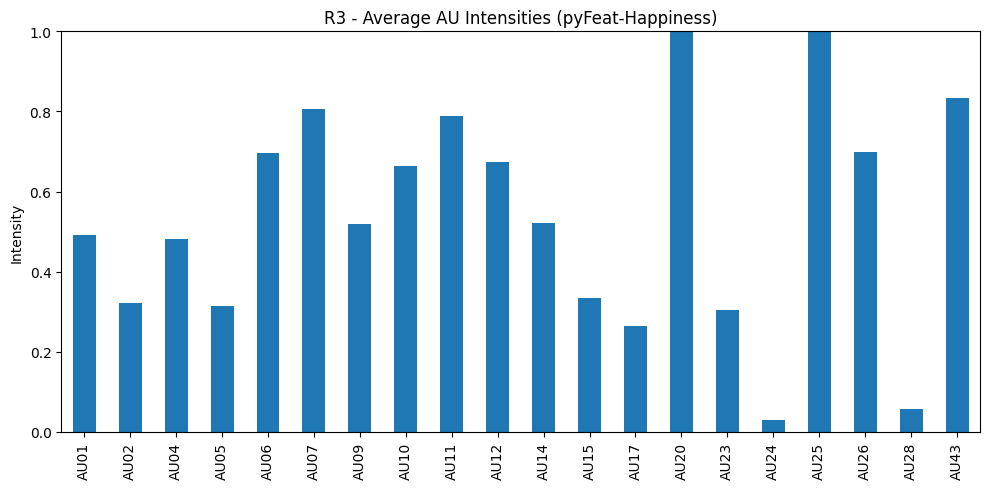

In [8]:
import matplotlib.pyplot as plt

average_aus.plot(kind='bar', figsize=(10, 5), title="R3 - Average AU Intensities (pyFeat-Happiness)")
plt.ylabel("Intensity")
plt.tight_layout()
plt.savefig("/home/maram/Downloads/PrendreLaParole/newFPS/resident3/happiness/happiness_pyFeat_au_plot.png")
plt.ylim(0, 1)
plt.show()

In [9]:
print(video_predictionHappiness.frame.unique())


[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118]


[<Figure size 1500x700 with 3 Axes>]

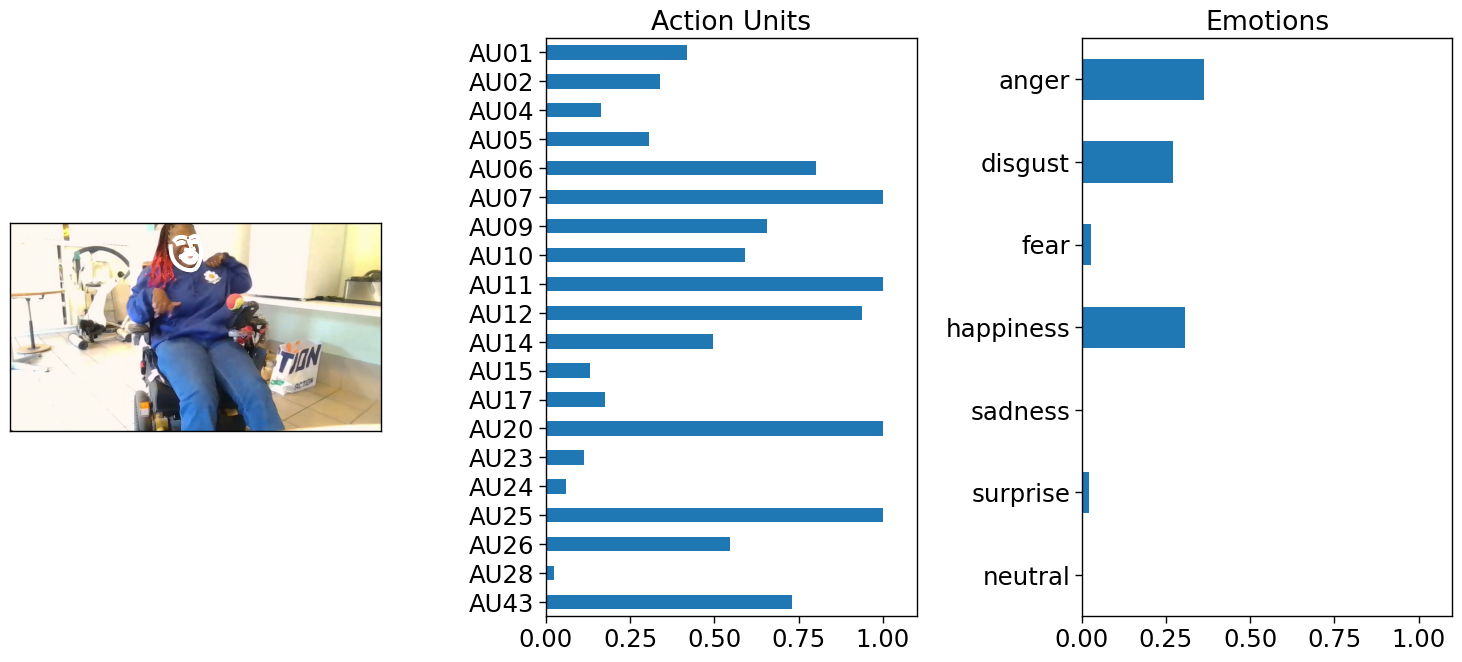

In [10]:
video_predictionHappiness.query("frame == 24").plot_detections(
    faceboxes=False, add_titles=False
)

In [11]:
video_predictionHappiness.emotions.head()

,anger,disgust,fear,happiness,sadness,surprise,neutral
frame,,,,,,,
0,0.716338,0.006955,0.062473,0.098708,0.047369,0.059620,0.008537
1,0.731676,0.013213,0.059994,0.079238,0.058970,0.045707,0.011203
2,0.545361,0.012985,0.036564,0.228058,0.125461,0.033999,0.017572
3,0.401539,0.005951,0.049803,0.333039,0.114687,0.071284,0.023697
4,0.400593,0.005951,0.050024,0.335616,0.114170,0.070532,0.023115


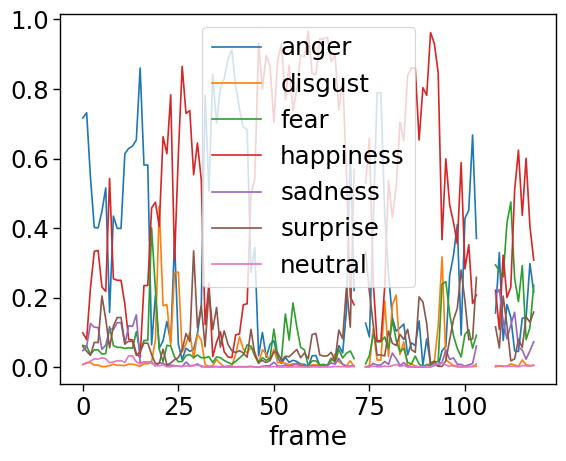

In [12]:
axes = video_predictionHappiness.emotions.plot()

## 2. Processing the 2nd video: Fear

### 2.1 Load the video

In [13]:
emotionFear_dir = os.path.join(base_path, "fear")

for filename in os.listdir(emotionFear_dir):
    if filename.lower().endswith(".mp4"):
        path_to_vidFear = os.path.join(emotionFear_dir, filename)
        print(f"\n--- fear ---")
        video = cv2.VideoCapture(path_to_vidFear)
        fps = video.get(cv2.CAP_PROP_FPS)
        print(f"FPS: {fps}")
        video.release()
        display(Video(path_to_vidFear, embed=False))



--- fear ---
FPS: 25.0


### 2.2 Process the video

In [14]:
video_predictionFear = detector.detect_video(
    path_to_vidFear, data_type="video", skip_frames=1, face_detection_threshold=0.95
)

  0%|          | 0/138 [00:00<?, ?it/s]INFO:root:VideoDataset: RESCALING WARNING: from (720, 1280) to output_size=700
INFO:root:detecting faces...
INFO:root:detecting landmarks...
INFO:root:RESCALING WARNING: image_operations.extract_face_from_bbox() is rescaling cropped img with shape torch.Size([3, 84, 84]) to 112
INFO:root:detecting poses...
INFO:root:img2pose: RESCALING WARNING: img2pose has a min img size of 400 and a max img size of 1400 but checked value is torch.Size([393, 700]).
INFO:root:detecting aus...
INFO:root:detecting emotions...
INFO:root:detecting identity...
INFO:root:RESCALING WARNING: image_operations.extract_face_from_bbox() is rescaling cropped img with shape torch.Size([3, 84, 84]) to 112
INFO:root:inverting face transform...
INFO:root:inverting landmark transform...
INFO:root:creating fex output...
  1%|          | 1/138 [00:01<02:55,  1.28s/it]INFO:root:VideoDataset: RESCALING WARNING: from (720, 1280) to output_size=700
INFO:root:detecting faces...
INFO:root:

### save as csv

In [15]:
import os

csv_path = os.path.join(os.path.dirname(path_to_vidFear), "pyFeat-fear.csv")
video_predictionFear.aus.to_csv(csv_path)

### 1.3 Visualizing predictions

In [16]:
video_predictionFear.aus

,AU01,AU02,AU04,AU05,AU06,AU07,AU09,AU10,AU11,AU12,AU14,AU15,AU17,AU20,AU23,AU24,AU25,AU26,AU28,AU43
frame,,,,,,,,,,,,,,,,,,,,
0,0.626522,0.379405,0.734652,0.323454,0.835908,0.0,0.500730,0.239133,1.0,0.701330,0.474965,0.395393,0.266264,1.0,0.176891,0.017007,0.997377,0.755251,0.011294,0.838276
1,0.605902,0.168275,0.651997,0.348773,0.862139,1.0,0.609079,0.493370,1.0,0.748663,0.563509,0.354020,0.284180,1.0,0.187916,0.007501,0.997794,0.847174,0.015371,0.816403
2,0.597097,0.137303,0.409947,0.255355,0.806229,1.0,0.647124,0.167950,1.0,0.643712,0.397821,0.151646,0.244557,1.0,0.123310,0.006581,0.998986,0.810308,0.014757,0.892331
3,0.607884,0.184129,0.738250,0.228045,0.851186,1.0,0.552953,0.383127,1.0,0.723122,0.537171,0.191081,0.275041,1.0,0.137350,0.011405,0.990771,0.883194,0.008851,0.889542
4,0.554827,0.194015,0.677224,0.240110,0.764499,0.0,0.720456,0.622068,1.0,0.605959,0.489286,0.521468,0.159919,1.0,0.287164,0.007851,0.999719,0.749436,0.007158,0.902857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,0.492950,0.243564,0.300835,0.252771,0.783495,1.0,0.759738,0.086040,1.0,0.466351,0.619509,0.547351,0.199887,1.0,0.350317,0.009527,0.998803,0.732637,0.063295,0.930466
134,0.515403,0.230494,0.373995,0.238799,0.791306,1.0,0.756643,0.517193,1.0,0.433968,0.648804,0.518829,0.172779,1.0,0.346776,0.009226,0.997391,0.676841,0.081772,0.925370
135,0.469177,0.240915,0.210034,0.234789,0.777937,1.0,0.753094,0.502830,1.0,0.407375,0.592444,0.453991,0.170482,1.0,0.307212,0.009484,0.997567,0.763422,0.062179,0.932366


In [17]:
average_aus = video_predictionFear.aus.mean()

# Display the result
print("Average AU intensities across all frames (Fear) :\n")
print(average_aus)

Average AU intensities across all frames (Fear) :

AU01    0.457968
AU02    0.192764
AU04    0.342809
AU05    0.306689
AU06    0.809629
AU07    0.543478
AU09    0.581380
AU10    0.441421
AU11    0.666667
AU12    0.697339
AU14    0.615625
AU15    0.306920
AU17    0.261028
AU20    0.992754
AU23    0.232329
AU24    0.032556
AU25    0.972668
AU26    0.638053
AU28    0.030711
AU43    0.858045
dtype: float32


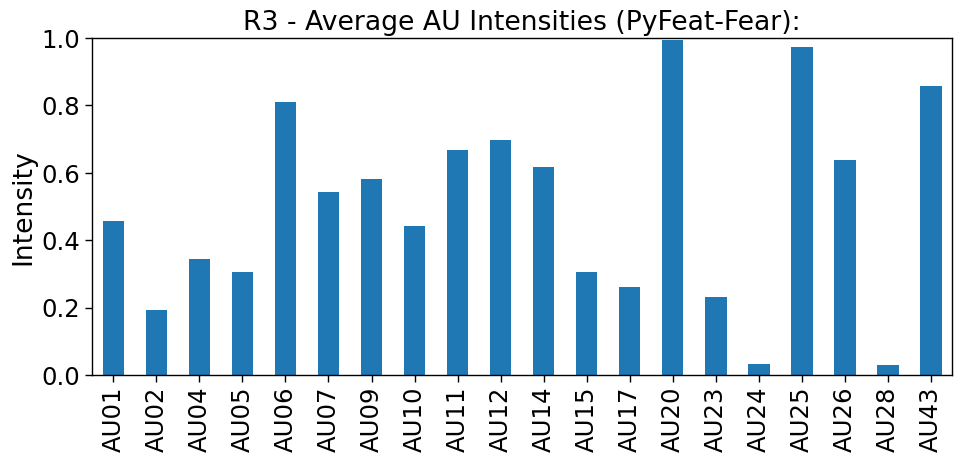

In [18]:
import matplotlib.pyplot as plt

average_aus.plot(kind='bar', figsize=(10, 5), title="R3 - Average AU Intensities (PyFeat-Fear):")
plt.ylabel("Intensity")
plt.tight_layout()
plt.ylim(0, 1)
plt.savefig("/home/maram/Downloads/PrendreLaParole/newFPS/resident3/fear/fear_pyFeat_au_plot.png")
plt.show()

In [19]:
video_predictionFear.emotions.head()

,anger,disgust,fear,happiness,sadness,surprise,neutral
frame,,,,,,,
0,0.057527,0.003357,0.106742,0.758706,0.009275,0.058987,0.005407
1,0.127021,0.028072,0.091264,0.216143,0.453284,0.043783,0.040433
2,0.192193,0.032503,0.181711,0.255634,0.225633,0.018893,0.093432
3,0.068199,0.020020,0.119647,0.445487,0.217560,0.041060,0.088027
4,0.060741,0.069087,0.042239,0.392446,0.387303,0.016209,0.031976


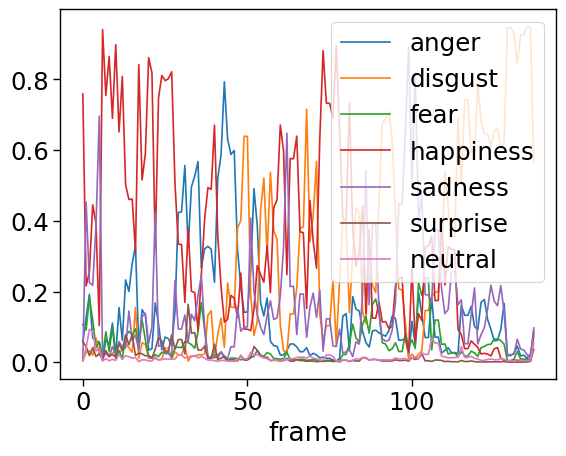

In [20]:
axes = video_predictionFear.emotions.plot()

## 3. Processing the 3rd video: Sadness

### 3.1 Load the video

In [21]:
emotionSadness_dir = os.path.join(base_path, "sadness")

for filename in os.listdir(emotionSadness_dir):
    if filename.lower().endswith(".mp4"):
        path_to_vidSadness = os.path.join(emotionSadness_dir, filename)
        print(f"\n--- sadness ---")
        video = cv2.VideoCapture(path_to_vidSadness)
        fps = video.get(cv2.CAP_PROP_FPS)
        print(f"FPS: {fps}")
        video.release()
        display(Video(path_to_vidSadness, embed=False))



--- sadness ---
FPS: 25.0


### 3.2 Process the video

In [22]:
video_predictionSadness = detector.detect_video(
    path_to_vidSadness, data_type="video", skip_frames=1, face_detection_threshold=0.95
)

  0%|          | 0/63 [00:00<?, ?it/s]INFO:root:VideoDataset: RESCALING WARNING: from (720, 1280) to output_size=700
INFO:root:detecting faces...
INFO:root:detecting landmarks...
INFO:root:RESCALING WARNING: image_operations.extract_face_from_bbox() is rescaling cropped img with shape torch.Size([3, 90, 90]) to 112
INFO:root:detecting poses...
INFO:root:img2pose: RESCALING WARNING: img2pose has a min img size of 400 and a max img size of 1400 but checked value is torch.Size([393, 700]).
INFO:root:detecting aus...
INFO:root:detecting emotions...
INFO:root:detecting identity...
INFO:root:RESCALING WARNING: image_operations.extract_face_from_bbox() is rescaling cropped img with shape torch.Size([3, 90, 90]) to 112
INFO:root:inverting face transform...
INFO:root:inverting landmark transform...
INFO:root:creating fex output...
  2%|▏         | 1/63 [00:01<01:24,  1.37s/it]INFO:root:VideoDataset: RESCALING WARNING: from (720, 1280) to output_size=700
INFO:root:detecting faces...
INFO:root:de

### save as csv

In [23]:
import os

csv_path = os.path.join(os.path.dirname(path_to_vidSadness), "pyFeat-sadness.csv")
video_predictionSadness.aus.to_csv(csv_path)

### 3.3 Visualizing results

In [24]:
video_predictionSadness.aus

,AU01,AU02,AU04,AU05,AU06,AU07,AU09,AU10,AU11,AU12,AU14,AU15,AU17,AU20,AU23,AU24,AU25,AU26,AU28,AU43
frame,,,,,,,,,,,,,,,,,,,,
0,0.419576,0.295284,0.235051,0.289507,0.626046,0.0,0.508392,0.158674,0.0,0.876535,0.530246,0.511755,0.360823,1.0,0.233094,0.009562,0.996382,0.577001,0.056290,0.866461
1,0.434931,0.189236,0.266817,0.282194,0.661930,0.0,0.533393,0.222903,1.0,0.860125,0.563439,0.640029,0.396452,1.0,0.302158,0.012823,0.998843,0.719102,0.100014,0.874972
2,0.451939,0.318294,0.311315,0.295577,0.631777,1.0,0.519757,0.536453,0.0,0.790160,0.530323,0.798566,0.377049,1.0,0.398710,0.015367,0.999145,0.583481,0.074454,0.871222
3,0.434974,0.297556,0.286442,0.289828,0.598257,1.0,0.471026,0.401740,0.0,0.745953,0.494158,0.578395,0.356480,1.0,0.398599,0.017522,0.999386,0.560775,0.029353,0.831969
4,0.358677,0.269929,0.518931,0.279851,0.611403,1.0,0.458963,0.245829,0.0,0.705256,0.516449,0.678957,0.358142,1.0,0.456824,0.019260,0.998731,0.676032,0.064517,0.843467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,0.344400,0.295756,0.561043,0.262074,0.299561,0.0,0.510755,0.352336,1.0,0.208227,0.481275,0.643960,0.438711,1.0,0.513510,0.038171,0.997863,0.493560,0.197412,0.930524
59,0.399624,0.197289,0.551690,0.279343,0.401363,1.0,0.511936,0.638539,1.0,0.265652,0.297557,0.585549,0.500312,1.0,0.495732,0.034792,0.997800,0.595719,0.160654,0.932944
60,0.462669,0.288940,0.514752,0.290084,0.451519,1.0,0.507673,0.034433,1.0,0.255408,0.370205,0.310012,0.426064,1.0,0.519381,0.032859,0.999341,0.666610,0.116790,0.888471


In [25]:
average_aus = video_predictionSadness.aus.mean()

# Display the result
print("Average AU intensities across all frames (sadness):\n")
print(average_aus)

Average AU intensities across all frames (sadness):

AU01    0.392695
AU02    0.231283
AU04    0.554995
AU05    0.267261
AU06    0.411237
AU07    0.428571
AU09    0.560722
AU10    0.346042
AU11    0.571429
AU12    0.345829
AU14    0.432916
AU15    0.540153
AU17    0.464332
AU20    0.730159
AU23    0.515428
AU24    0.093979
AU25    0.983019
AU26    0.580330
AU28    0.193974
AU43    0.863432
dtype: float32


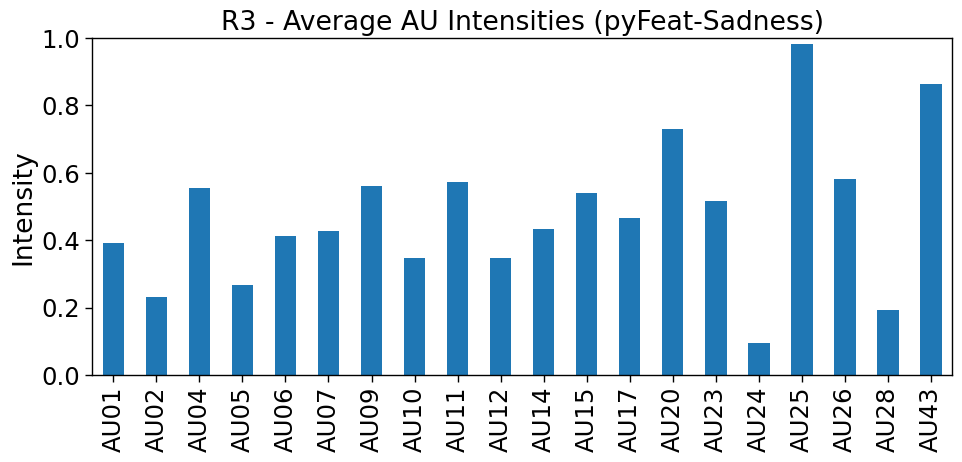

In [26]:
import matplotlib.pyplot as plt

average_aus.plot(kind='bar', figsize=(10, 5), title="R3 - Average AU Intensities (pyFeat-Sadness)")
plt.ylabel("Intensity")
plt.tight_layout()
plt.ylim(0, 1)
plt.savefig("/home/maram/Downloads/PrendreLaParole/newFPS/resident3/sadness/sadness_pyFeat_au_plot.png")
plt.show()

In [27]:
video_predictionSadness.emotions.head()

,anger,disgust,fear,happiness,sadness,surprise,neutral
frame,,,,,,,
0,0.406213,0.570554,0.007985,0.003728,0.009662,0.000633,0.001224
1,0.510884,0.465377,0.010280,0.003476,0.007857,0.001003,0.001123
2,0.677177,0.302694,0.009396,0.002329,0.006552,0.000972,0.000881
3,0.419967,0.562609,0.008629,0.002063,0.005602,0.000551,0.000579
4,0.228291,0.760561,0.004362,0.001583,0.004184,0.000411,0.000609


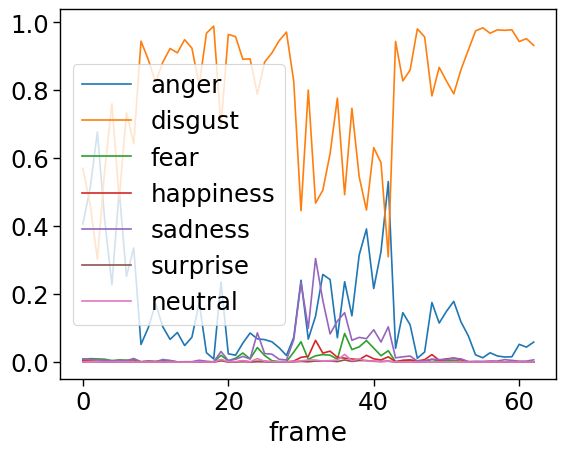

In [28]:
axes = video_predictionSadness.emotions.plot()

## 4. Processing the 4th video: Disgust

### 4.1 Load the video

In [29]:
emotionDisgust_dir = os.path.join(base_path, "disgust")

for filename in os.listdir(emotionDisgust_dir):
    if filename.lower().endswith(".mp4"):
        path_to_vidDisgust = os.path.join(emotionDisgust_dir, filename)
        print(f"\n--- disgust ---")
        video = cv2.VideoCapture(path_to_vidDisgust)
        fps = video.get(cv2.CAP_PROP_FPS)
        print(f"FPS: {fps}")
        video.release()
        display(Video(path_to_vidDisgust, embed=False))



--- disgust ---
FPS: 25.0


### 4.2 Process the video

In [30]:
video_predictionDisgust = detector.detect_video(
    path_to_vidDisgust, data_type="video", skip_frames=1, face_detection_threshold=0.95
)

  0%|          | 0/170 [00:00<?, ?it/s]INFO:root:VideoDataset: RESCALING WARNING: from (720, 1280) to output_size=700
INFO:root:detecting faces...
INFO:root:detecting landmarks...
INFO:root:RESCALING WARNING: image_operations.extract_face_from_bbox() is rescaling cropped img with shape torch.Size([3, 86, 86]) to 112
INFO:root:detecting poses...
INFO:root:img2pose: RESCALING WARNING: img2pose has a min img size of 400 and a max img size of 1400 but checked value is torch.Size([393, 700]).
INFO:root:detecting aus...
INFO:root:detecting emotions...
INFO:root:detecting identity...
INFO:root:RESCALING WARNING: image_operations.extract_face_from_bbox() is rescaling cropped img with shape torch.Size([3, 86, 86]) to 112
INFO:root:inverting face transform...
INFO:root:inverting landmark transform...
INFO:root:creating fex output...
  1%|          | 1/170 [00:01<03:29,  1.24s/it]INFO:root:VideoDataset: RESCALING WARNING: from (720, 1280) to output_size=700
INFO:root:detecting faces...
INFO:root:

### Save as csv

In [31]:
import os

csv_path = os.path.join(os.path.dirname(path_to_vidDisgust), "pyFeat-disgust.csv")
video_predictionDisgust.aus.to_csv(csv_path)

### 3.3 Visualizing results

In [32]:
video_predictionDisgust.aus

,AU01,AU02,AU04,AU05,AU06,AU07,AU09,AU10,AU11,AU12,AU14,AU15,AU17,AU20,AU23,AU24,AU25,AU26,AU28,AU43
frame,,,,,,,,,,,,,,,,,,,,
0,0.601569,0.251334,0.660228,0.277257,0.422290,1.0,0.440041,0.038303,1.0,0.383428,0.558265,0.618786,0.393892,1.0,0.485022,0.134400,0.843724,0.744651,0.059281,0.701018
1,0.584593,0.235343,0.602462,0.263262,0.422919,1.0,0.471219,0.026677,1.0,0.371602,0.446777,0.518802,0.421491,1.0,0.472303,0.159171,0.939203,0.745373,0.045152,0.710914
2,0.570482,0.290208,0.806613,0.258617,0.452625,1.0,0.462804,0.008414,1.0,0.314832,0.344915,0.583786,0.389158,1.0,0.375618,0.171259,0.994719,0.773341,0.074257,0.668915
3,0.617101,0.297268,0.713760,0.257847,0.477696,1.0,0.477208,0.027051,1.0,0.462400,0.319907,0.386795,0.386491,1.0,0.299210,0.186408,0.996729,0.744734,0.033313,0.718613
4,0.594485,0.341692,0.664809,0.270072,0.434473,1.0,0.472956,0.029331,1.0,0.315341,0.328511,0.415883,0.408343,1.0,0.334673,0.166742,0.996695,0.782045,0.099999,0.716816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0.490763,0.524957,0.318361,0.337441,0.471151,0.0,0.303740,0.069858,1.0,0.283922,0.466981,0.794580,0.418449,0.0,0.306056,0.474904,0.929622,0.299080,0.341890,0.734337
166,0.434314,0.529127,0.503306,0.346440,0.436599,1.0,0.277966,0.337817,1.0,0.317204,0.445684,0.816882,0.459393,0.0,0.332975,0.618931,0.595447,0.335235,0.261414,0.796062
167,0.448290,0.544033,0.616233,0.337806,0.426834,1.0,0.321225,0.483995,1.0,0.246901,0.451986,0.508571,0.498845,0.0,0.294523,0.448043,0.268642,0.307666,0.082137,0.789570


In [33]:
average_aus = video_predictionDisgust.aus.mean()

# Display the result
print("Average AU intensities across all frames (Dsigust):\n")
print(average_aus)

Average AU intensities across all frames (Dsigust):

AU01    0.431835
AU02    0.374629
AU04    0.353307
AU05    0.378681
AU06    0.560093
AU07    0.757396
AU09    0.430973
AU10    0.493727
AU11    0.585799
AU12    0.544319
AU14    0.461047
AU15    0.383704
AU17    0.425049
AU20    0.627219
AU23    0.409622
AU24    0.287128
AU25    0.918391
AU26    0.551313
AU28    0.092359
AU43    0.710561
dtype: float32


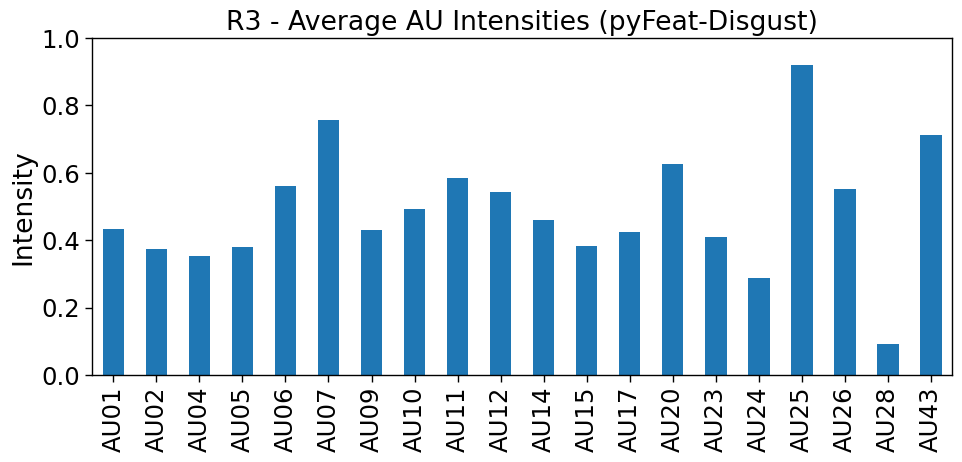

In [34]:
import matplotlib.pyplot as plt

average_aus.plot(kind='bar', figsize=(10, 5), title="R3 - Average AU Intensities (pyFeat-Disgust)")
plt.ylabel("Intensity")
plt.tight_layout()
plt.savefig("/home/maram/Downloads/PrendreLaParole/newFPS/resident3/disgust/disgust_pyFeat_au_plot.png")
plt.ylim(0, 1)
plt.show()

In [35]:
video_predictionDisgust.emotions.head()

,anger,disgust,fear,happiness,sadness,surprise,neutral
frame,,,,,,,
0,0.513010,0.354747,0.079271,0.002101,0.045762,0.002514,0.002594
1,0.411240,0.491596,0.054060,0.001836,0.036028,0.002648,0.002592
2,0.485312,0.412565,0.052471,0.002043,0.041354,0.003058,0.003198
3,0.390762,0.536453,0.031685,0.002237,0.033335,0.002334,0.003194
4,0.550724,0.369063,0.036176,0.002463,0.034299,0.003518,0.003757


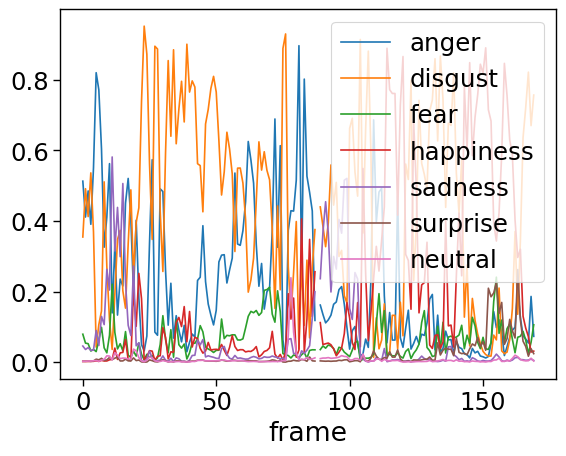

In [36]:
axes = video_predictionDisgust.emotions.plot()

## 5. Processing the 5th video: Surprise

### 5.1 Load th video

In [37]:
emotionSurprise_dir = os.path.join(base_path, "surprise")

for filename in os.listdir(emotionSurprise_dir):
    if filename.lower().endswith(".mp4"):
        path_to_vidSurprise = os.path.join(emotionSurprise_dir, filename)
        print(f"\n--- surprise ---")
        video = cv2.VideoCapture(path_to_vidSurprise)
        fps = video.get(cv2.CAP_PROP_FPS)
        print(f"FPS: {fps}")
        video.release()
        display(Video(path_to_vidSurprise, embed=False))


--- surprise ---
FPS: 25.0


### 5.2 Process the video

In [38]:
video_predictionSurprise = detector.detect_video(
    path_to_vidSurprise, data_type="video", skip_frames=1, face_detection_threshold=0.95
)

  0%|          | 0/154 [00:00<?, ?it/s]INFO:root:VideoDataset: RESCALING WARNING: from (720, 1280) to output_size=700
INFO:root:detecting faces...
INFO:root:detecting landmarks...
INFO:root:RESCALING WARNING: image_operations.extract_face_from_bbox() is rescaling cropped img with shape torch.Size([3, 90, 92]) to 112
INFO:root:detecting poses...
INFO:root:img2pose: RESCALING WARNING: img2pose has a min img size of 400 and a max img size of 1400 but checked value is torch.Size([393, 700]).
INFO:root:detecting aus...
INFO:root:detecting emotions...
INFO:root:detecting identity...
INFO:root:RESCALING WARNING: image_operations.extract_face_from_bbox() is rescaling cropped img with shape torch.Size([3, 90, 92]) to 112
INFO:root:inverting face transform...
INFO:root:inverting landmark transform...
INFO:root:creating fex output...
  1%|          | 1/154 [00:01<03:29,  1.37s/it]INFO:root:VideoDataset: RESCALING WARNING: from (720, 1280) to output_size=700
INFO:root:detecting faces...
INFO:root:

### save as csv

In [39]:
import os

csv_path = os.path.join(os.path.dirname(path_to_vidSurprise), "pyFeat-surprise.csv")
video_predictionSurprise.aus.to_csv(csv_path)

### 5.3 Visualizing results

In [40]:
video_predictionSurprise.aus

,AU01,AU02,AU04,AU05,AU06,AU07,AU09,AU10,AU11,AU12,AU14,AU15,AU17,AU20,AU23,AU24,AU25,AU26,AU28,AU43
frame,,,,,,,,,,,,,,,,,,,,
0,0.321936,0.190959,0.195786,0.278300,0.863462,1.0,0.702119,0.783522,1.0,0.868406,0.831644,0.447226,0.270903,1.0,0.153843,0.032469,0.999769,0.703873,0.043405,0.904520
1,0.404180,0.183680,0.450104,0.276149,0.863976,1.0,0.801958,0.875381,1.0,0.899673,0.850391,0.318139,0.305051,1.0,0.147477,0.055831,0.998434,0.436278,0.022224,0.898485
2,0.331651,0.198677,0.556773,0.286106,0.844990,0.0,0.792191,0.926839,1.0,0.918251,0.783864,0.391854,0.326011,1.0,0.197974,0.049448,0.999410,0.491056,0.109481,0.900968
3,0.316306,0.180826,0.323236,0.280139,0.839867,0.0,0.811109,0.846881,1.0,0.917707,0.741865,0.271720,0.345130,1.0,0.164295,0.048447,0.998527,0.352265,0.078219,0.902926
4,0.320750,0.148094,0.765646,0.278312,0.748967,1.0,0.829565,0.936294,1.0,0.854477,0.653946,0.358823,0.303801,1.0,0.177975,0.046435,0.999514,0.483148,0.136160,0.913270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,0.534118,0.509988,0.590915,0.325417,0.725441,1.0,0.522798,0.097760,1.0,0.798101,0.691906,0.198901,0.546296,0.0,0.175616,0.470971,0.987553,0.421515,0.216143,0.868344
150,0.322777,0.435536,0.510993,0.315012,0.751175,1.0,0.588821,0.327729,1.0,0.764299,0.605247,0.355614,0.578260,0.0,0.174905,0.476905,0.972122,0.474139,0.250960,0.882612
151,0.634645,0.561893,0.511549,0.339403,0.863061,1.0,0.712915,0.597203,1.0,0.886408,0.351661,0.328265,0.366496,1.0,0.093811,0.166054,0.970933,0.593620,0.073831,0.899409


In [41]:
average_aus = video_predictionSurprise.aus.mean()

# Display the result
print("Average AU intensities across all frames (Surprise):\n")
print(average_aus)

Average AU intensities across all frames (Surprise):

AU01    0.368380
AU02    0.361016
AU04    0.442702
AU05    0.345336
AU06    0.553658
AU07    0.700000
AU09    0.430717
AU10    0.462847
AU11    0.433333
AU12    0.500525
AU14    0.502094
AU15    0.461467
AU17    0.409146
AU20    0.575000
AU23    0.280290
AU24    0.319608
AU25    0.938063
AU26    0.402546
AU28    0.150091
AU43    0.779562
dtype: float32


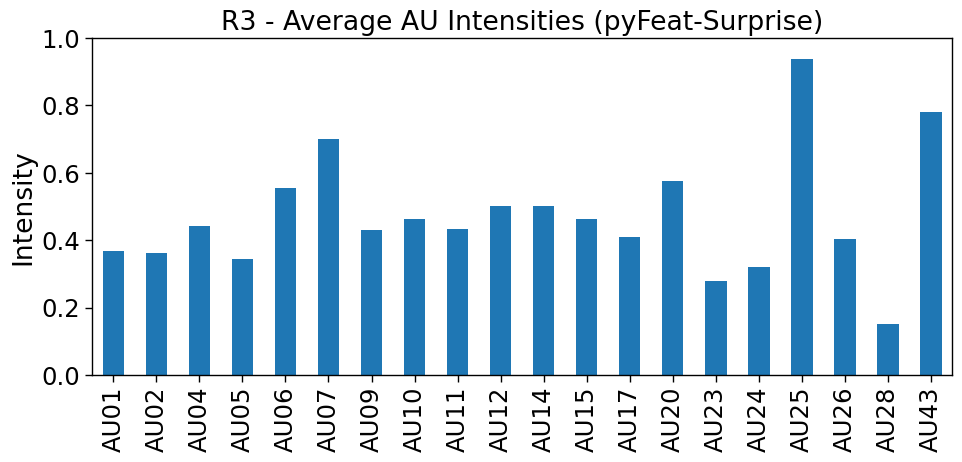

In [42]:
import matplotlib.pyplot as plt

average_aus.plot(kind='bar', figsize=(10, 5), title="R3 - Average AU Intensities (pyFeat-Surprise)")
plt.ylabel("Intensity")
plt.tight_layout()
plt.savefig("/home/maram/Downloads/PrendreLaParole/newFPS/resident3/surprise/surprise_pyFeat_au_plot.png")
plt.ylim(0, 1)
plt.show()

In [43]:
video_predictionSurprise.emotions.head()

,anger,disgust,fear,happiness,sadness,surprise,neutral
frame,,,,,,,
0,0.021507,0.640838,0.092823,0.179490,0.051646,0.000631,0.013064
1,0.030786,0.709094,0.053701,0.142459,0.041300,0.000433,0.022227
2,0.038405,0.840127,0.020705,0.065655,0.021509,0.000324,0.013275
3,0.029176,0.846023,0.031689,0.068618,0.013051,0.000240,0.011203
4,0.038405,0.735196,0.041742,0.109124,0.034023,0.000581,0.040929


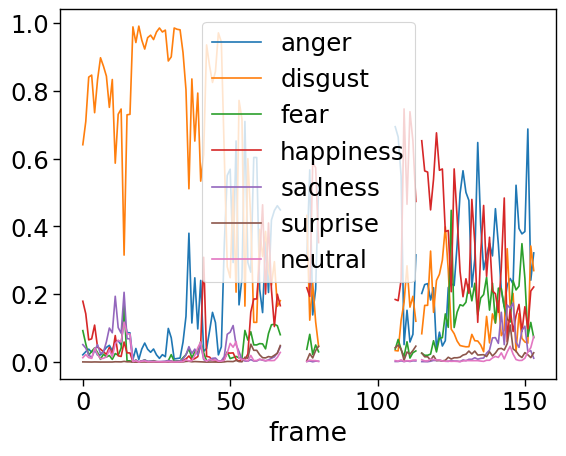

In [44]:
axes = video_predictionSurprise.emotions.plot()

## 6. Processing the 6th video: Anger

### 6.1 Load the video

In [45]:
emotionAnger_dir = os.path.join(base_path, "anger")

for filename in os.listdir(emotionAnger_dir):
    if filename.lower().endswith(".mp4"):
        path_to_vidAnger = os.path.join(emotionAnger_dir, filename)
        print(f"\n--- anger ---")
        video = cv2.VideoCapture(path_to_vidAnger)
        fps = video.get(cv2.CAP_PROP_FPS)
        print(f"FPS: {fps}")
        video.release()
        display(Video(path_to_vidAnger, embed=False))


--- anger ---
FPS: 25.0


### 6.2 Process the video

In [46]:
video_predictionAnger = detector.detect_video(
    path_to_vidAnger, data_type="video", skip_frames=1, face_detection_threshold=0.95
)

  0%|          | 0/278 [00:00<?, ?it/s]INFO:root:VideoDataset: RESCALING WARNING: from (720, 1280) to output_size=700
INFO:root:detecting faces...
INFO:root:detecting landmarks...
INFO:root:RESCALING WARNING: image_operations.extract_face_from_bbox() is rescaling cropped img with shape torch.Size([3, 90, 90]) to 112
INFO:root:detecting poses...
INFO:root:img2pose: RESCALING WARNING: img2pose has a min img size of 400 and a max img size of 1400 but checked value is torch.Size([393, 700]).
INFO:root:detecting aus...
INFO:root:detecting emotions...
INFO:root:detecting identity...
INFO:root:RESCALING WARNING: image_operations.extract_face_from_bbox() is rescaling cropped img with shape torch.Size([3, 90, 90]) to 112
INFO:root:inverting face transform...
INFO:root:inverting landmark transform...
INFO:root:creating fex output...
  0%|          | 1/278 [00:01<06:31,  1.41s/it]INFO:root:VideoDataset: RESCALING WARNING: from (720, 1280) to output_size=700
INFO:root:detecting faces...
INFO:root:

### save as csv

In [47]:
import os

csv_path = os.path.join(os.path.dirname(path_to_vidAnger), "pyFeat-anger.csv")
video_predictionAnger.aus.to_csv(csv_path)

### 6.3 Visualizing results

In [48]:
video_predictionAnger.aus

,AU01,AU02,AU04,AU05,AU06,AU07,AU09,AU10,AU11,AU12,AU14,AU15,AU17,AU20,AU23,AU24,AU25,AU26,AU28,AU43
frame,,,,,,,,,,,,,,,,,,,,
0,0.518661,0.147348,0.107458,0.306226,0.794790,0.0,0.573182,0.262725,1.0,0.734796,0.670186,0.269258,0.503123,1.0,0.522178,0.042062,0.973609,0.485152,0.081981,0.869510
1,0.481224,0.153072,0.128198,0.304474,0.794790,0.0,0.572953,0.075449,1.0,0.659545,0.638544,0.279993,0.503266,1.0,0.498122,0.041841,0.995854,0.422873,0.075134,0.860582
2,0.356389,0.114613,0.350936,0.267493,0.856673,0.0,0.537896,0.058562,1.0,0.683398,0.633823,0.337188,0.479635,1.0,0.472907,0.040397,0.995241,0.612756,0.053623,0.892673
3,0.341934,0.123762,0.358202,0.243482,0.881250,0.0,0.511179,0.317574,1.0,0.650194,0.706910,0.313245,0.276680,1.0,0.242929,0.060362,0.999197,0.668839,0.039153,0.781746
4,0.388691,0.167053,0.409763,0.347704,0.826663,0.0,0.524318,0.062189,1.0,0.764928,0.461047,0.292546,0.358524,1.0,0.365365,0.021355,0.996626,0.713241,0.031415,0.934319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,0.470434,0.416721,0.244742,0.349653,0.398485,1.0,0.419819,0.189814,0.0,0.197161,0.288262,0.369405,0.519179,0.0,0.355214,0.602165,0.543261,0.161412,0.148527,0.771141
274,0.427640,0.481045,0.283582,0.349926,0.392577,1.0,0.355769,0.729711,0.0,0.199975,0.455726,0.702984,0.559786,0.0,0.370355,0.548713,0.880894,0.229134,0.362956,0.753437
275,0.358926,0.494684,0.282906,0.336661,0.369951,1.0,0.409272,0.760552,0.0,0.202932,0.421007,0.481449,0.544696,0.0,0.364271,0.539520,0.874162,0.221946,0.230258,0.789802


In [49]:
average_aus = video_predictionAnger.aus.mean()

# Display the result
print("Average AU intensities across all frames (Anger) :\n")
print(average_aus)

Average AU intensities across all frames (Anger) :

AU01    0.413526
AU02    0.352239
AU04    0.403056
AU05    0.335251
AU06    0.549612
AU07    0.597122
AU09    0.418457
AU10    0.357739
AU11    0.622302
AU12    0.475379
AU14    0.445607
AU15    0.393526
AU17    0.406515
AU20    0.629496
AU23    0.328793
AU24    0.251036
AU25    0.892372
AU26    0.523463
AU28    0.097296
AU43    0.807126
dtype: float32


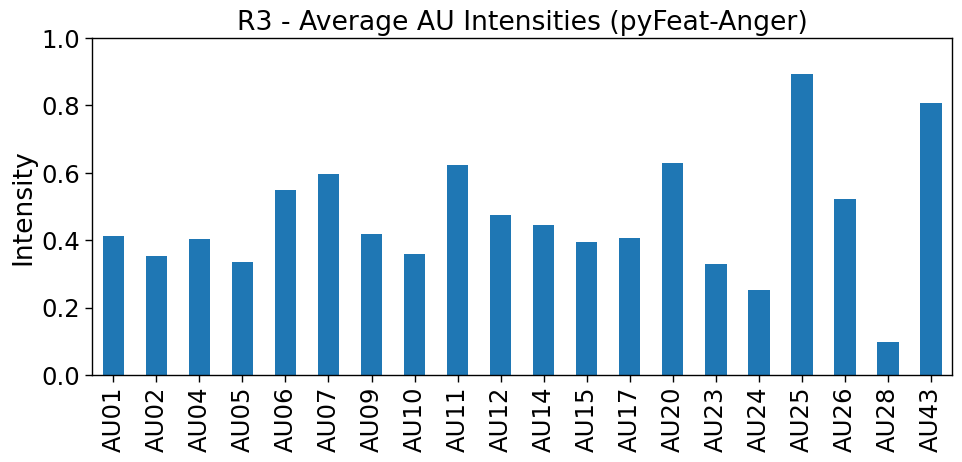

In [50]:
import matplotlib.pyplot as plt

average_aus.plot(kind='bar', figsize=(10, 5), title="R3 - Average AU Intensities (pyFeat-Anger)")
plt.ylabel("Intensity")
plt.tight_layout()
plt.savefig("/home/maram/Downloads/PrendreLaParole/newFPS/resident3/anger/anger_pyFeat_au_plot.png")
plt.ylim(0, 1)
plt.show()

In [51]:
video_predictionAnger.emotions.head()

,anger,disgust,fear,happiness,sadness,surprise,neutral
frame,,,,,,,
0,0.013049,0.047360,0.005358,0.914212,0.012315,0.004287,0.003420
1,0.012928,0.047674,0.005331,0.913628,0.012676,0.004298,0.003466
2,0.012339,0.036228,0.002868,0.926673,0.012669,0.004358,0.004866
3,0.008975,0.036934,0.002309,0.936789,0.005548,0.003349,0.006097
4,0.012758,0.066217,0.008627,0.879445,0.024406,0.004073,0.004473


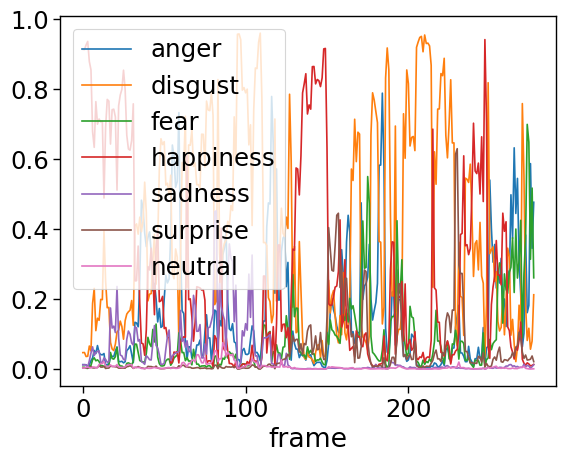

In [52]:
axes = video_predictionAnger.emotions.plot()